In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [5]:
vector_img = load_file('train_images_outrun_velocity.pkl')

In [6]:
imgs = []
numbers = []
for i in list(vector_img.keys()):
    if vector_img[i][1] != 45 and vector_img[i][1] != 23:
        imgs.append(np.expand_dims(vector_img[i][0],axis=-1))
        numbers.append(vector_img[i][1])

In [7]:
pd.Series(numbers).value_counts(normalize=True)

0    0.273546
1    0.167076
7    0.121212
2    0.075348
8    0.072891
6    0.071253
5    0.069615
9    0.053235
3    0.049140
4    0.046683
dtype: float64

In [8]:
# useful methods
def captcha_to_vec(captcha):    
    vector = np.zeros(word_len * word_class)
    
    for i,ch in enumerate(captcha):
        idex = i * word_class + char_indices[ch]
        vector[idex] = 1
    return vector

def vec_to_captcha(vec):
    text = []
    vec[vec < 0.5] = 0
        
    char_pos = vec.nonzero()[0]
    
    for i, ch in enumerate(char_pos):
        text.append(captcha_word[ch % word_class])
    return ''.join(text)

# parameters

captcha_word = "0123456789"

word_len = 1
word_class = len(captcha_word)

char_indices = dict((c, i) for i,c in enumerate(captcha_word))
indices_char = dict((i, c) for i,c in enumerate(captcha_word))

In [9]:
# test
captcha_to_vec(str(numbers[789])),numbers[789],len(captcha_to_vec(str(numbers[789])))

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 1, 10)

In [10]:
numbers[789]

1

In [11]:
vec_numbers = np.array([captcha_to_vec(str(i)) for i in numbers])

In [12]:
imgs = np.array(imgs)

In [13]:
imgs.shape

(1221, 28, 16, 1)

## Creating Model

In [19]:
input_shape =  (28, 16, 1)
print(input_shape)

(28, 16, 1)


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x/255,input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [22]:
# Trying almost to overfit the model

In [24]:
model.fit(imgs[:,:,:,:], vec_numbers[:,:], batch_size = 32, epochs=12)

Train on 1221 samples
Epoch 1/12
1221/1221 [==============================] - 0s 289us/sample - loss: 0.0395 - accuracy: 0.9918
Epoch 2/12
1221/1221 [==============================] - 1s 626us/sample - loss: 0.0388 - accuracy: 0.9918
Epoch 3/12
1221/1221 [==============================] - 1s 734us/sample - loss: 0.0285 - accuracy: 0.9934
Epoch 4/12
1221/1221 [==============================] - 0s 270us/sample - loss: 0.0267 - accuracy: 0.9943
Epoch 5/12
1221/1221 [==============================] - 0s 399us/sample - loss: 0.0241 - accuracy: 0.9943
Epoch 6/12
1221/1221 [==============================] - 0s 231us/sample - loss: 0.0232 - accuracy: 0.9943
Epoch 7/12
1221/1221 [==============================] - 0s 248us/sample - loss: 0.0263 - accuracy: 0.9943
Epoch 8/12
1221/1221 [==============================] - 0s 224us/sample - loss: 0.0237 - accuracy: 0.9934
Epoch 9/12
1221/1221 [==============================] - 0s 234us/sample - loss: 0.0252 - accuracy: 0.9943
Epoch 10/12
1221/1221 [=

In [25]:
model.save('model_velocity_outrun.h5')

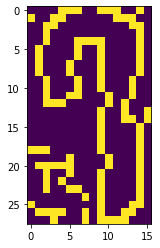

7


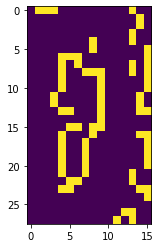

0


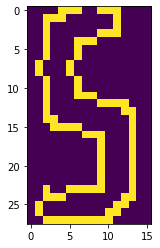

5


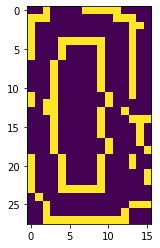

0


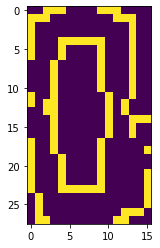

0


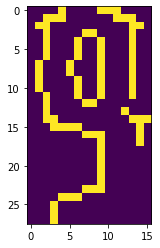

9


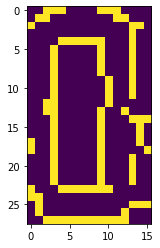

0


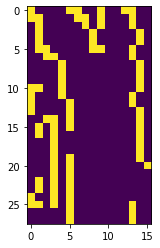

1


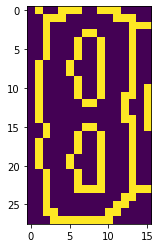

8


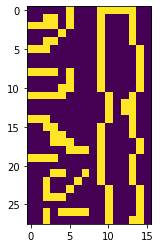

1


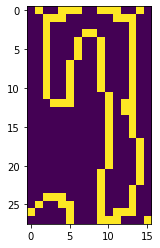

7


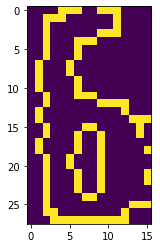

6


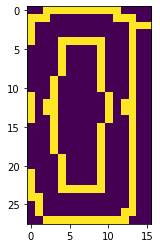

0


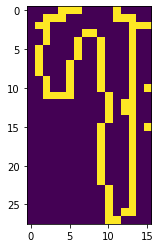

7


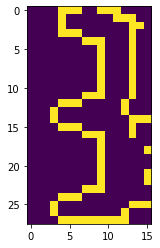

3


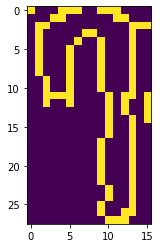

7


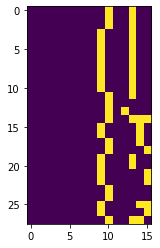

1


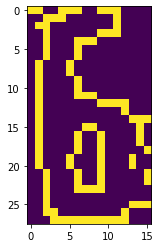

6


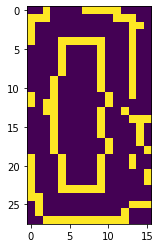

0


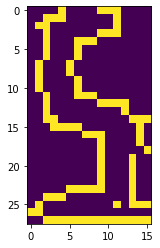

5


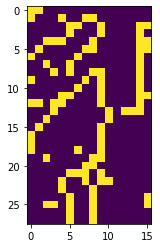

1


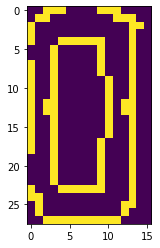

0


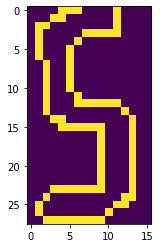

5


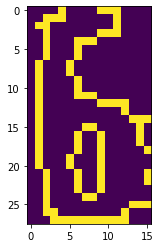

6


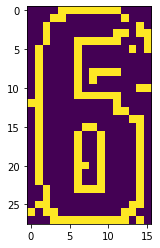

6


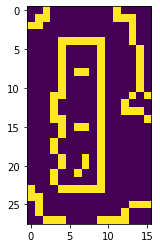

0


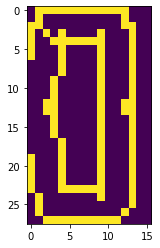

0


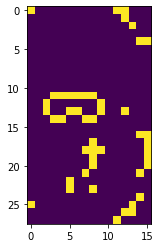

0


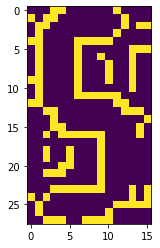

5


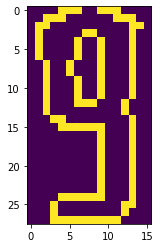

9


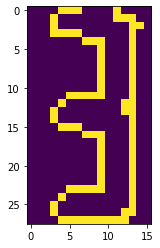

3


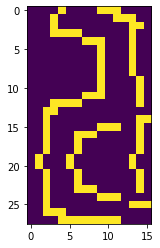

2


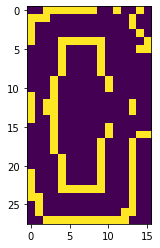

0


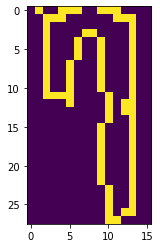

7


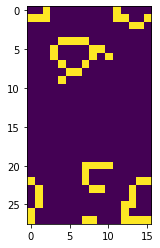

0


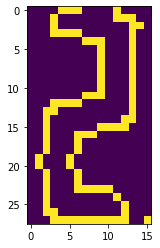

2


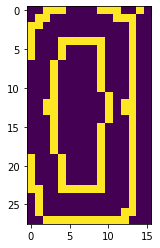

0


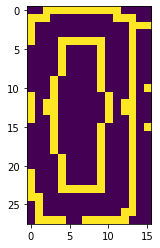

0


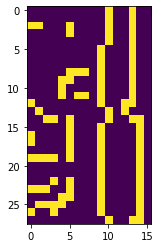

1


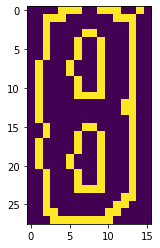

8


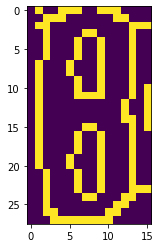

8


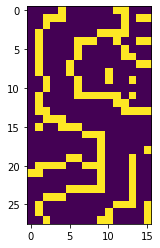

5


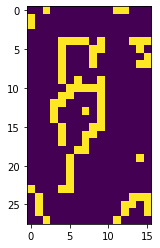

0


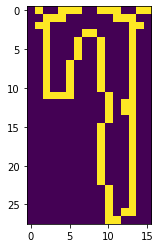

7


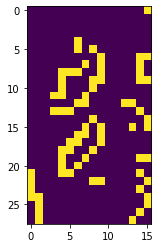

0


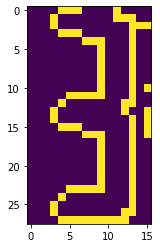

3


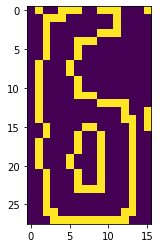

6


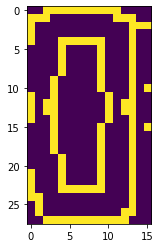

0


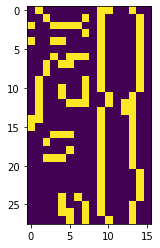

1


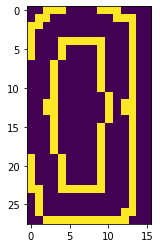

0


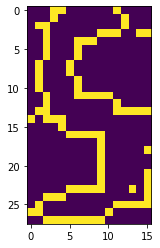

5


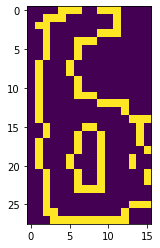

6


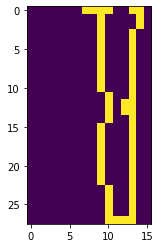

1


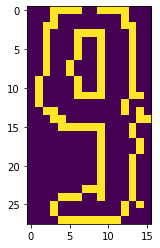

9


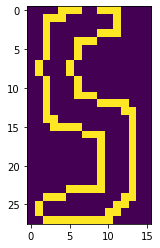

5


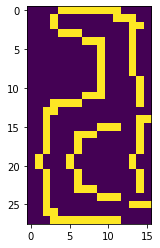

2


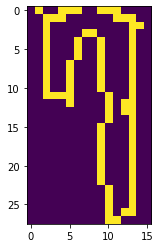

7


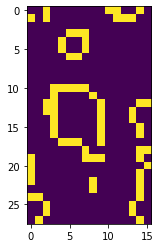

0


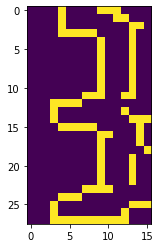

3


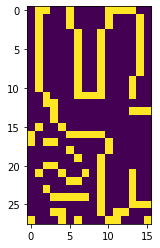

4


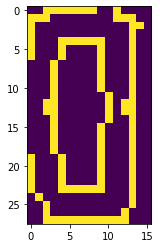

0


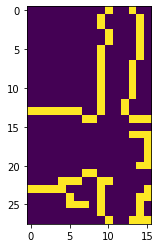

1


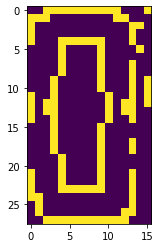

0


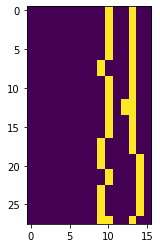

1


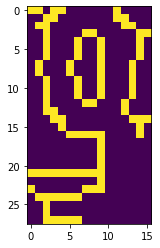

9


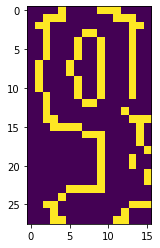

9


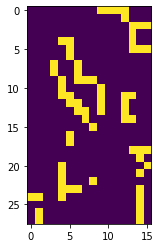

0


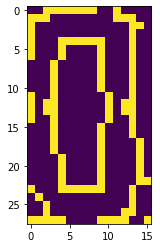

0


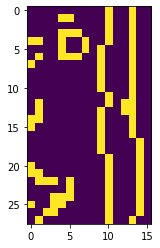

1


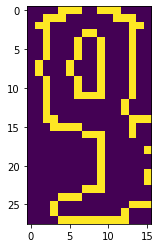

9


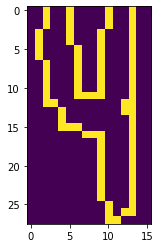

4


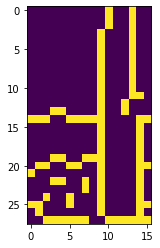

1


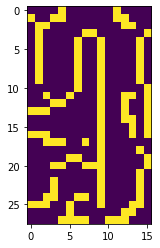

7


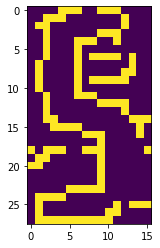

5


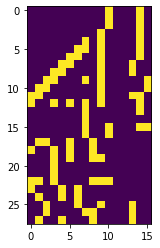

1


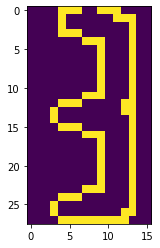

3


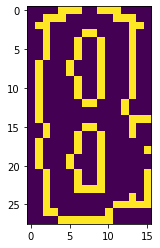

8


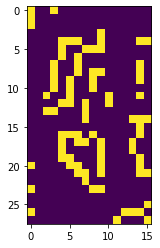

0


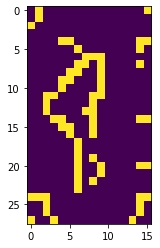

0


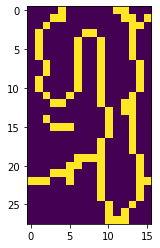

7


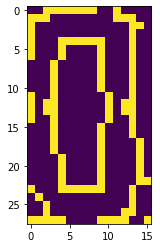

0


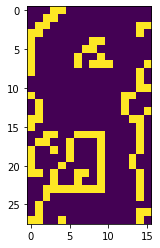

9


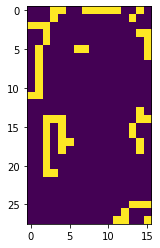

9


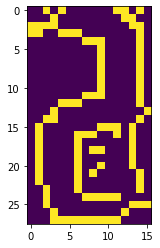

2


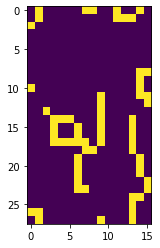

0


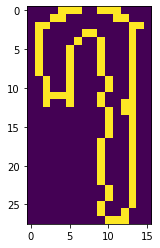

7


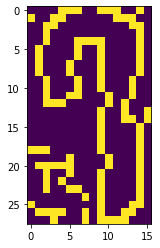

7


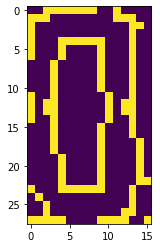

0


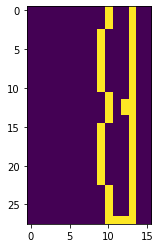

1


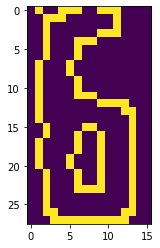

6


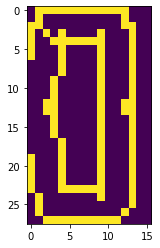

0


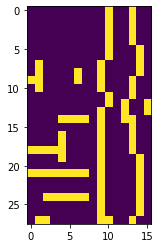

1


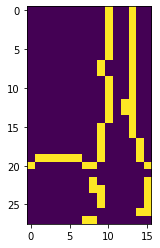

1


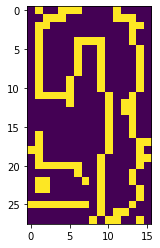

7


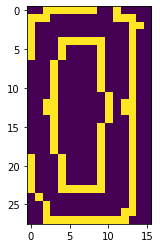

0


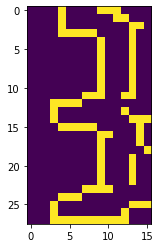

3


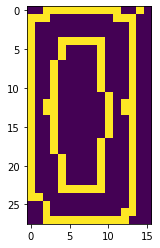

0


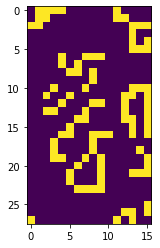

0


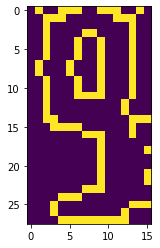

9


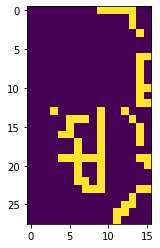

0


In [26]:
for i in np.random.randint(0,len(imgs),100):
  plt.imshow(imgs[i][:,:,0])
  plt.show()
  print(vec_to_captcha(model.predict(np.expand_dims(imgs[i],axis=0))[0]))